In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("Customer Churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
customer_churn = df.copy()

# here we can see the data type of the serial 19 is object so we need to check with excel file for missing value as tenure is 0 for them 

In [7]:
customer_churn['TotalCharges'] = customer_churn['TotalCharges'].replace(" ", 0) ## this is beacuse of present of empty cells python is converting it into text
customer_churn['TotalCharges'] = customer_churn['TotalCharges'].astype("float")

In [8]:
customer_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Descriptive Analysis

In [10]:
customer_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Check for the duplicates based on single column also

In [12]:
customer_churn["customerID"].duplicated().sum()

0

In [13]:
customer_churn["SeniorCitizen"].replace({0,1},{"no","yes"},inplace=True)

# This function will also replace the same 
def conv(value):
    if value == 1: 
        return "yes"
    else: 
        return "no" 
customer_churn["SeniorCitizen"] = customer_churn["SeniorCitizen"].apply(conv)

In [15]:
customer_churn["SeniorCitizen"].value_counts()

SeniorCitizen
yes    5901
no     1142
Name: count, dtype: int64

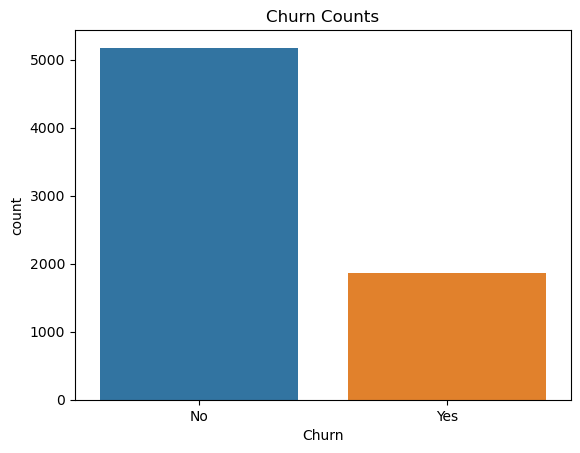

In [34]:
sns.countplot(data=customer_churn,x= "Churn");
plt.title("Churn Counts");

## Checking for the exact bar number 

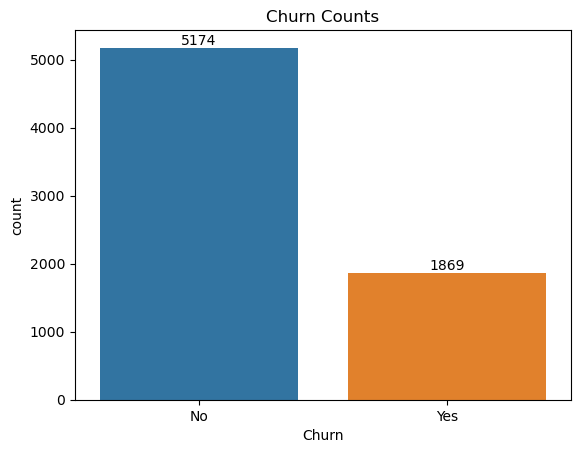

In [39]:
ax = sns.countplot(data=customer_churn,x= "Churn");
ax.bar_label(ax.containers[0])
plt.title("Churn Counts");

# Pie Chart 

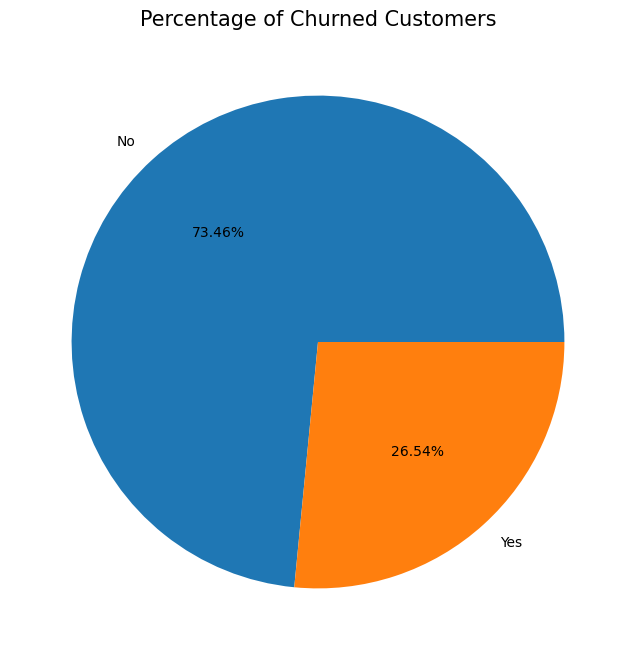

In [104]:
plt.figure(figsize=(8,8))
gb = customer_churn.groupby("Churn").agg({"Churn": "count"});
plt.pie(gb["Churn"], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 15);

## from the given pie chart 26.54% of our customers are churned out ## Now lets explore the reason 

Text(0.5, 1.0, 'Churn By Gender')

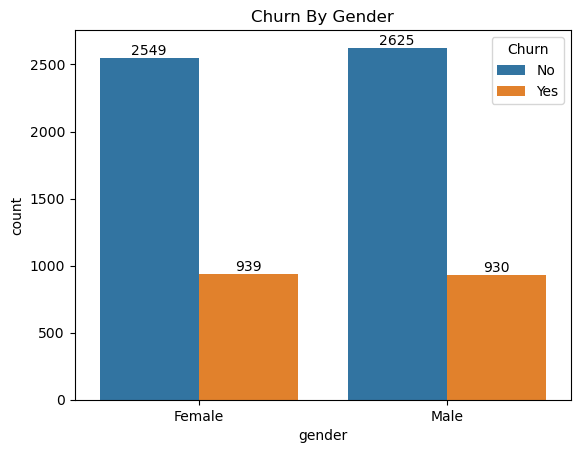

In [227]:
ax = sns.countplot(data= customer_churn, x = "gender", hue= "Churn");
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
plt.title("Churn By Gender")

Text(0.5, 1.0, 'Churn By SeniorCitizen')

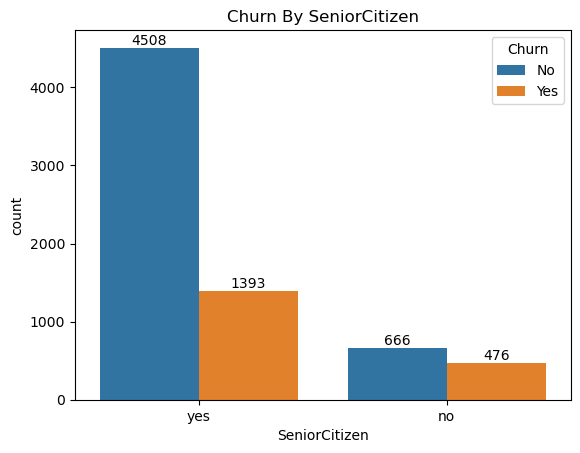

In [229]:
ax = sns.countplot(data= customer_churn, x = "SeniorCitizen", hue= "Churn");
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
plt.title("Churn By SeniorCitizen")

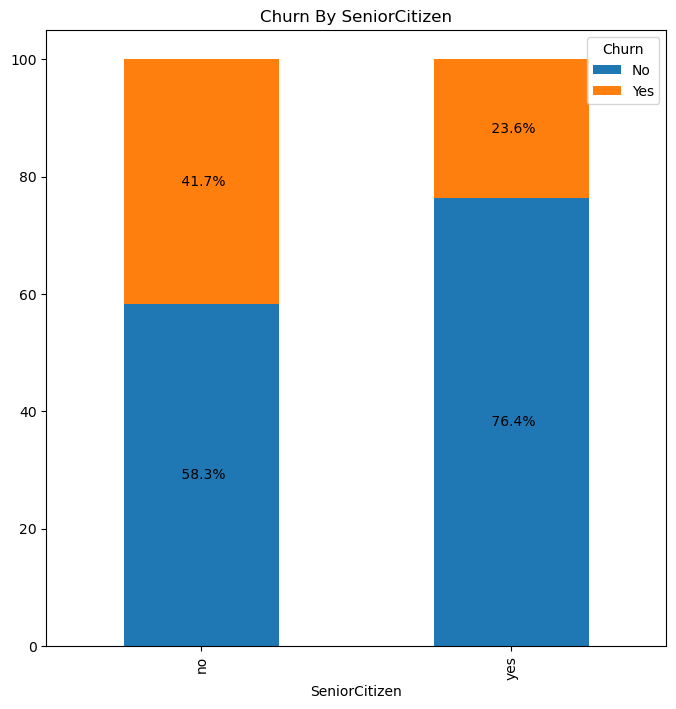

In [137]:
churn_counts = customer_churn.groupby("SeniorCitizen")["Churn"].value_counts(normalize=True).unstack() * 100

fig,ax= plt.subplots(figsize=(8,8))
# Create a stacked column chart
churn_counts.plot(kind="bar", stacked=True, ax = ax)

# Add labels to the bars
for p in ax.patches: 
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width /2 , y + height /2, f'{height: .1f}%', ha = 'center' , va ='center')
   
plt.legend(title= 'Churn', loc ='upper right')
# Set the title
plt.title("Churn By SeniorCitizen")

# Show the plot
plt.show()

## Comparative a greater percentage of people in senior citizen category have churned 

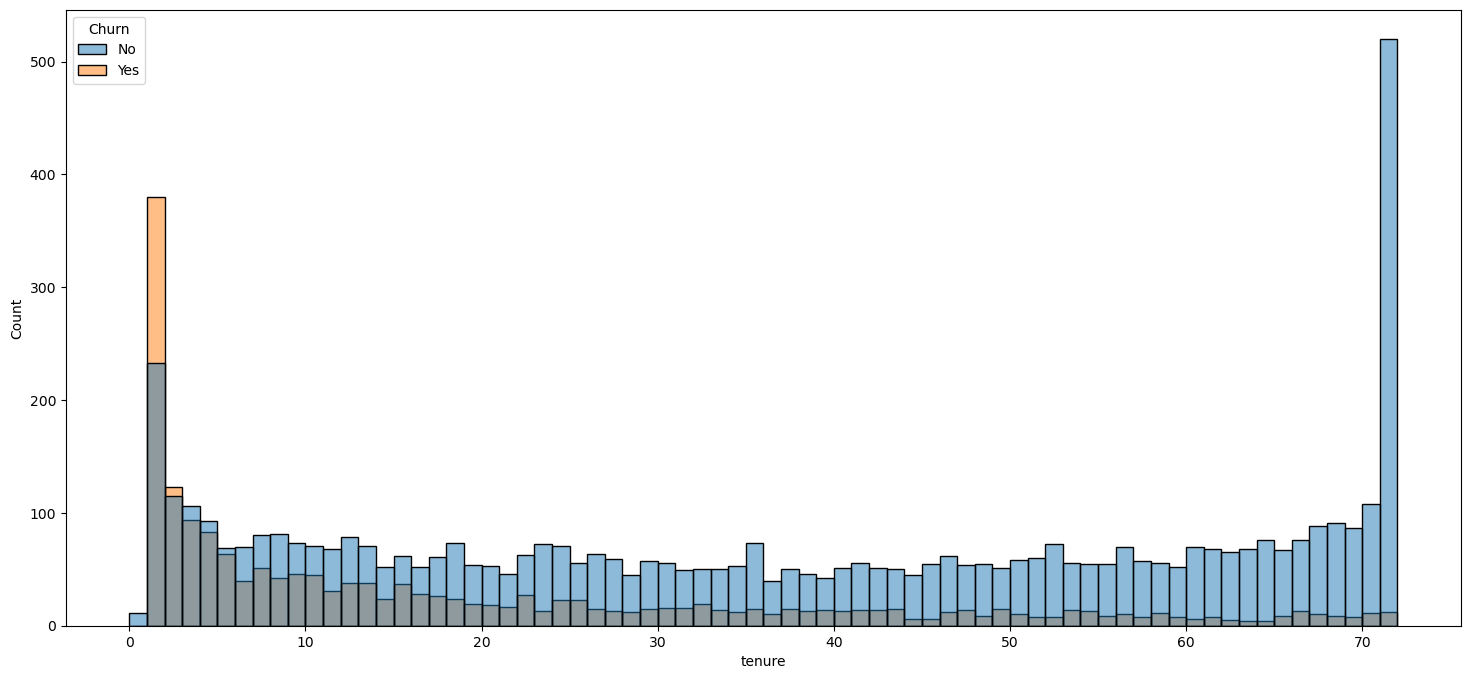

In [154]:
plt.figure(figsize=(18,8))
sns.histplot(x = "tenure", data = customer_churn, bins = 72, hue= "Churn");

## People who have used our services for a long time have stayed and people who have used our services for 1 -2 months have churned 

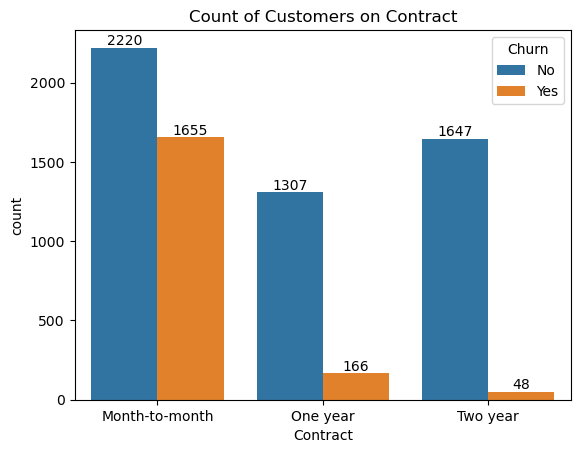

In [231]:
ax = sns.countplot(data= customer_churn, x = "Contract", hue= "Churn");
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
plt.title("Count of Customers on Contract");

## people to have month to month are likely to churn from those who have 1-2 year of contract

In [178]:
customer_churn.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

<Axes: xlabel='StreamingMovies', ylabel='count'>

<Figure size 1000x1000 with 0 Axes>

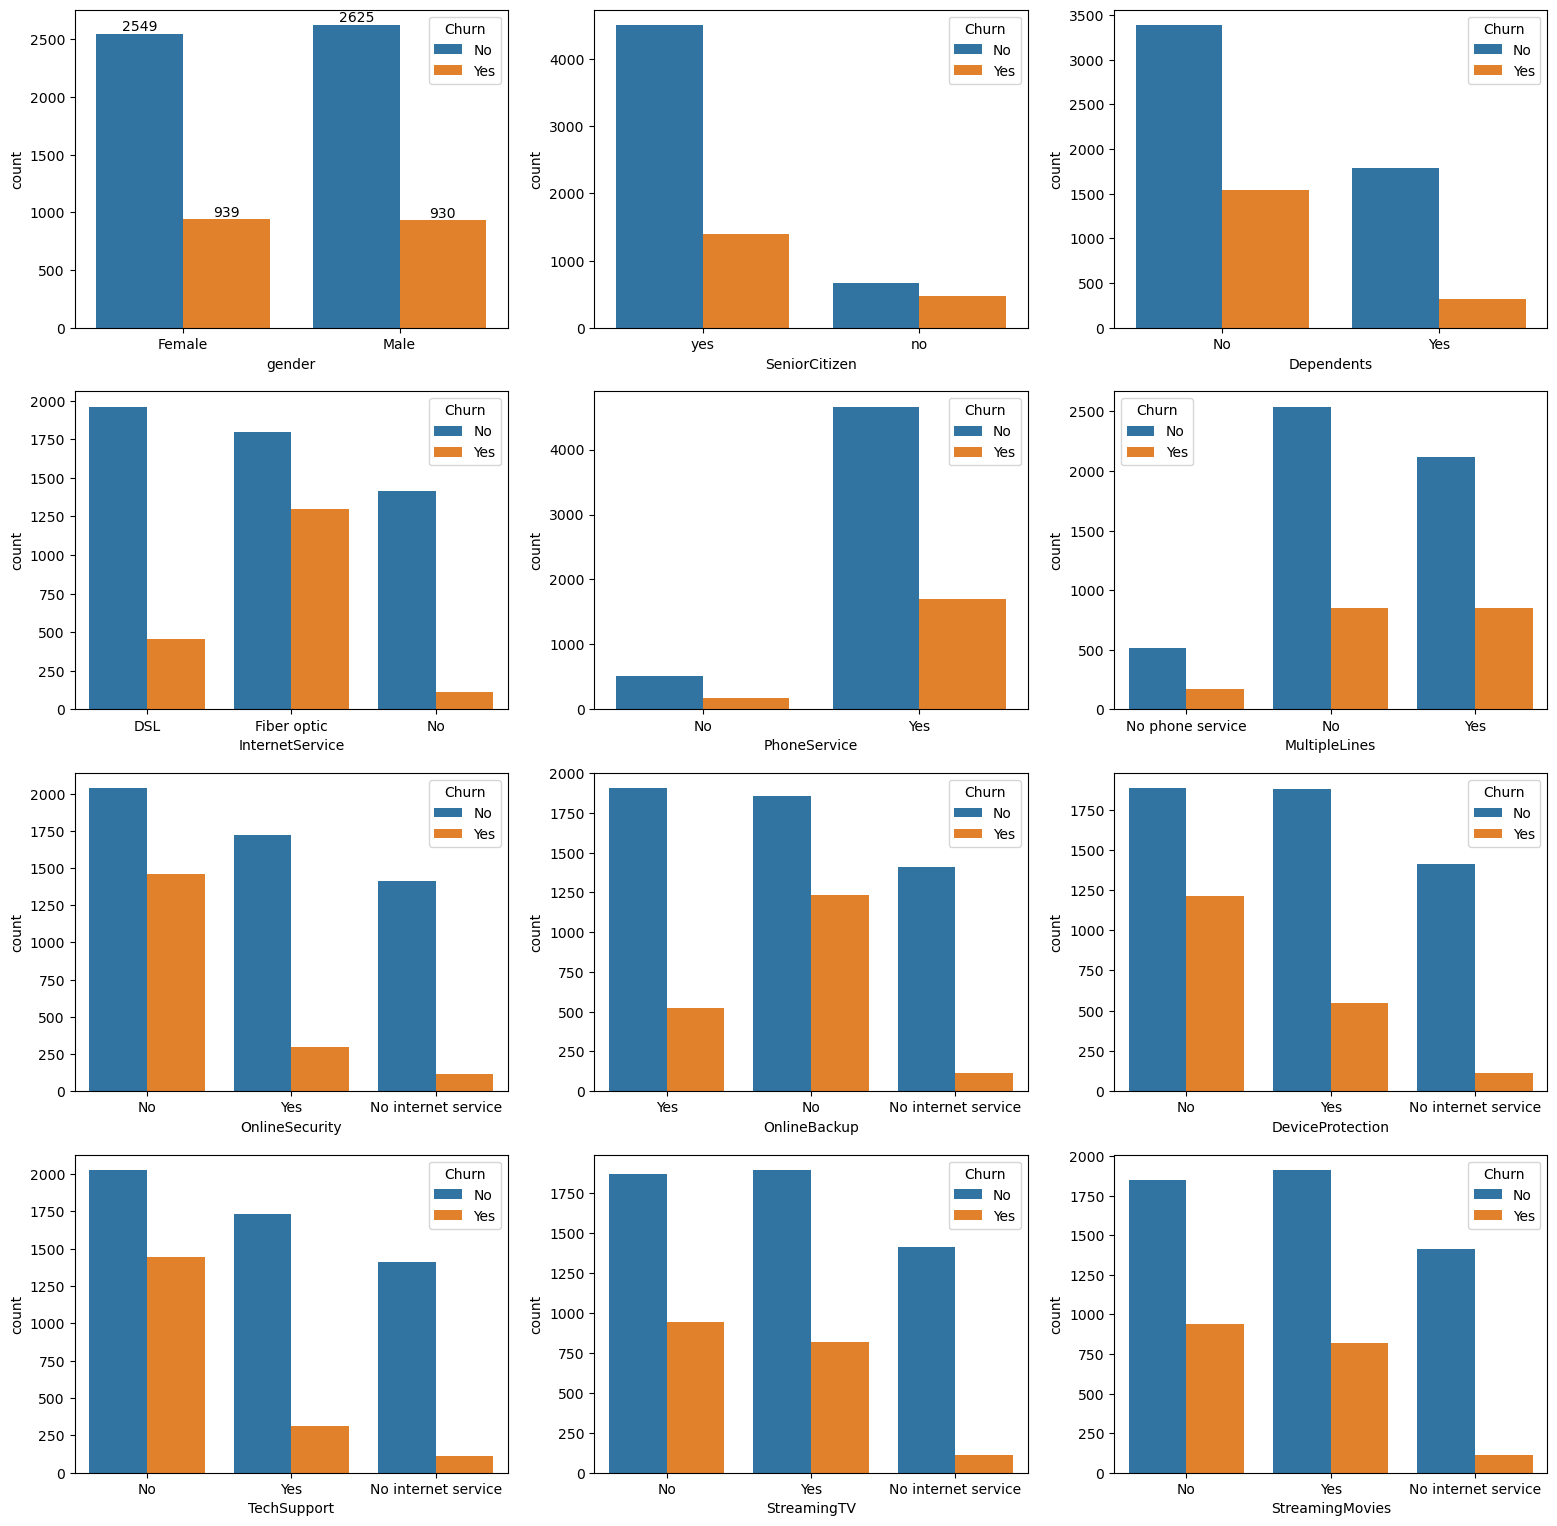

In [233]:
plt.figure(figsize=(10,10));
fig,axes =plt.subplots(4,3,figsize=(19,19))
a = sns.countplot(data=customer_churn, x ='gender', ax = axes[0][0], hue= "Churn")
a.bar_label(a.containers[0])
a.bar_label(a.containers[1]);## we can add multiple lables everywhere 
sns.countplot(data=customer_churn, x ='SeniorCitizen', ax = axes[0][1],hue= "Churn" )
sns.countplot(data=customer_churn, x ='Dependents', ax = axes[0][2], hue= "Churn")
sns.countplot(data=customer_churn, x ='InternetService', ax = axes[1][0], hue= "Churn")
sns.countplot(data=customer_churn, x ='PhoneService', ax = axes[1][1], hue= "Churn")
sns.countplot(data=customer_churn, x ='MultipleLines', ax = axes[1][2], hue= "Churn")
sns.countplot(data=customer_churn, x ='OnlineSecurity', ax = axes[2][0], hue= "Churn")
sns.countplot(data=customer_churn, x ='OnlineBackup', ax = axes[2][1], hue= "Churn")
sns.countplot(data=customer_churn, x ='DeviceProtection', ax = axes[2][2], hue= "Churn")
sns.countplot(data=customer_churn, x ='TechSupport', ax = axes[3][0], hue= "Churn")
sns.countplot(data=customer_churn, x ='StreamingTV', ax = axes[3][1], hue= "Churn")
sns.countplot(data=customer_churn, x ='StreamingMovies', ax = axes[3][2], hue= "Churn")

## It compares churned (left the company) versus non-churned customers across various categories. These categories include gender, SeniorCitizen status, Partner status, Dependents, PhoneService, MultipleLines, InternetService, and more. Each bar graph represents the count of customers in each category. The data likely serves as a foundation for understanding factors influencing customer retention.

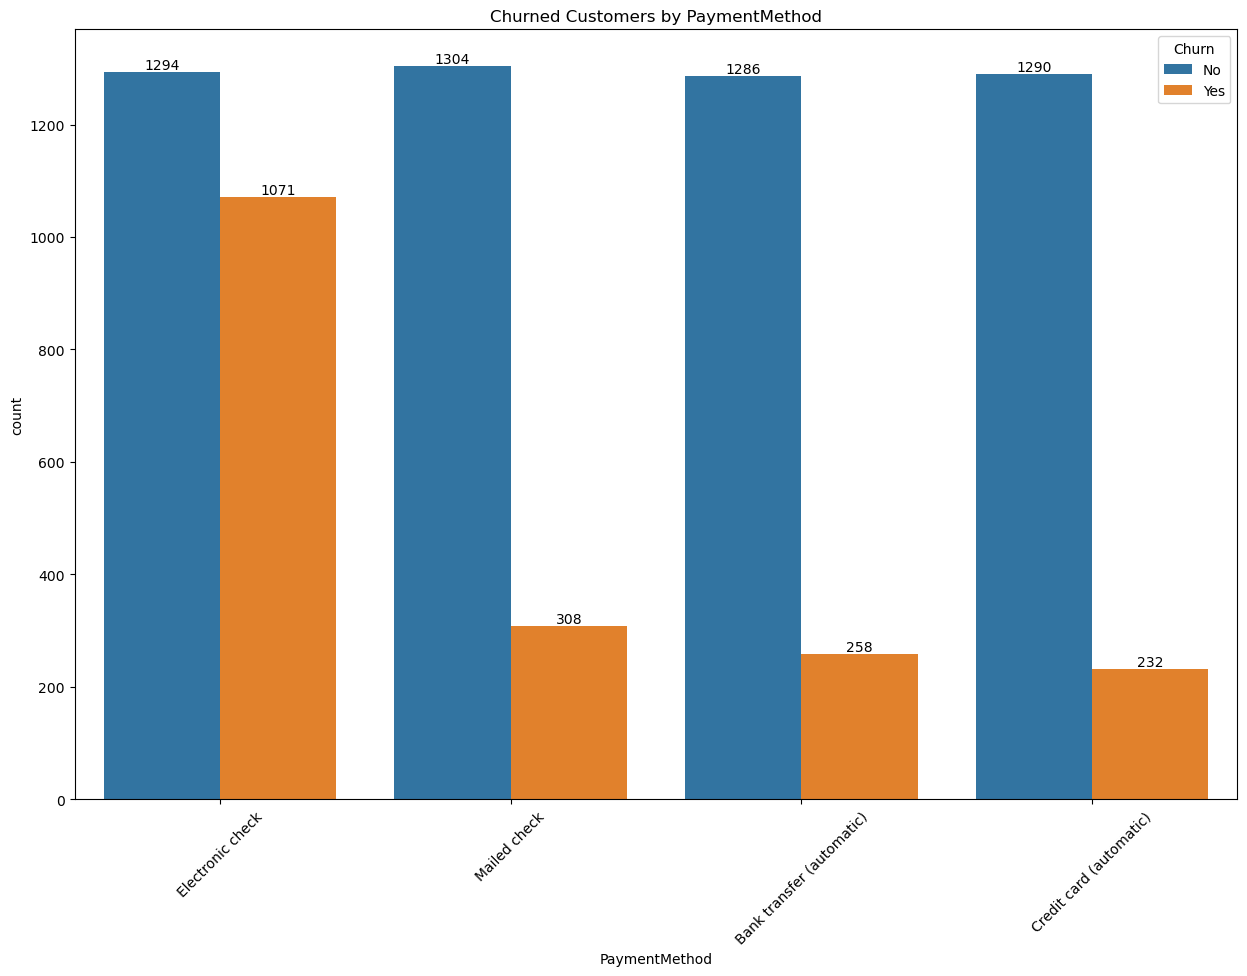

In [246]:
plt.figure(figsize=(15,10))
ax = sns.countplot(data= customer_churn, x = "PaymentMethod", hue= "Churn");
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
plt.title("Churned Customers by PaymentMethod");
plt.xticks(rotation =45);

## Customer is likely to churn when he/she is using as a payment method 